In [1]:
## import relevant libraries

import requests
import json

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')

# Reading the datasets

In [2]:
try:
    data_prop = pd.read_csv('properties.csv', index_col= 0)
    data_cust = pd.read_csv('customers.csv', index_col= 0)
except:
    data_prop = pd.read_csv('properties.csv', index_col=0)
    data_cust = pd.read_csv('customers.csv', index_col= 0)

### Properties

In [3]:
print("properties data:")
print()
data_prop.info()
print(data_prop.head())

## here the data types
## first five overview of the properties dataset


properties data:

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ﻿id         267 non-null    int64  
 1   building    267 non-null    int64  
 2   date_sale   267 non-null    object 
 3   type        267 non-null    object 
 4   property#   267 non-null    int64  
 5   area        267 non-null    float64
 6   price       267 non-null    object 
 7   status      267 non-null    object 
 8   customerid  195 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 20.9+ KB
    ﻿id  building  date_sale       type  property#     area         price  \
0  1030         1  11/1/2005  Apartment         30   743.09  $246,172.68    
1  1029         1  10/1/2005  Apartment         29   756.21  $246,331.90    
2  2002         2   7/1/2007  Apartment          2   587.28  $209,280.91    
3  2031         2  12/1/2007  Apartment         31  1604.75  

In [4]:
prop = data_prop.copy()
print("Columns name of properties dataset:")
prop.columns

## create new dataframe and 
## check the columns name

Columns name of properties dataset:


Index(['﻿id', 'building', 'date_sale', 'type', 'property#', 'area', 'price',
       'status', 'customerid'],
      dtype='object')

### Customers dataset

In [5]:
## check customers data dtypes
print("Customers dataset:")
data_cust.info()
print(data_cust.head())

## First five rows of the dataset

Customers dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ﻿customerid        162 non-null    object
 1   entity             162 non-null    object
 2   name               162 non-null    object
 3   surname            162 non-null    object
 4   birth_date         155 non-null    object
 5   sex                155 non-null    object
 6   country            162 non-null    object
 7   state              154 non-null    object
 8   purpose            162 non-null    object
 9   deal_satisfaction  162 non-null    int64 
 10  mortgage           162 non-null    object
 11  source             162 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.5+ KB
  ﻿customerid      entity     name  surname  birth_date  sex country  \
0       C0110  Individual   Kareem      Liu   5/11/1968    F     USA   
1       C0010  Individual  

In [6]:
cust = data_cust.copy()
cust.head()

## create new dataframe of customers dataset

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [7]:
print("Columns name of customers dataset:")
cust.columns
## check column names

Columns name of customers dataset:


Index(['﻿customerid', 'entity', 'name', 'surname', 'birth_date', 'sex',
       'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source'],
      dtype='object')

# Data Cleaning and Preprocessing

### Properties

In [8]:
print('Statistical explanation of properties dataset:')
print(prop.describe(include = 'all'))

Statistical explanation of properties dataset:
                ﻿id    building date_sale       type   property#         area  \
count    267.000000  267.000000       267        267  267.000000   267.000000   
unique          NaN         NaN        44          2         NaN          NaN   
top             NaN         NaN     #NUM!  Apartment         NaN          NaN   
freq            NaN         NaN        72        259         NaN          NaN   
mean    2975.142322    2.947566       NaN        NaN   27.580524   936.221311   
std     1392.197474    1.391794       NaN        NaN   15.361437   284.894858   
min     1002.000000    1.000000       NaN        NaN    1.000000   410.710000   
25%     2015.500000    2.000000       NaN        NaN   14.500000   756.210000   
50%     3024.000000    3.000000       NaN        NaN   28.000000   798.280000   
75%     4031.500000    4.000000       NaN        NaN   40.000000  1121.950000   
max     5052.000000    5.000000       NaN        NaN   59.0000

In [9]:
# remove dollar symbol from from price column and change it to price_in_$ , convert to float as well

prop["price_in_$"] = prop["price"].replace('[\$,]', '', regex = True).astype('float')


# drop the existing 'price' column
column1 = "price"
prop.drop(column1 , axis = 1, inplace = True)

## drop old price column

In [10]:
### change column name "propertiy#" to 'property'
prop.rename( columns ={"property#": "property"}, inplace = True)

### Rename "customerid" to customer_id in the properties

prop.rename(columns = {'customerid': 'customer_id'}, inplace = True)

In [11]:
### Check datatypes of properties data
print("datatypes of properties data:")
prop.dtypes

datatypes of properties data:


id              int64
building         int64
date_sale       object
type            object
property         int64
area           float64
status          object
customer_id     object
price_in_$     float64
dtype: object

In [12]:
## convert object to category in properties data
prop['type'] = prop['type'].astype('category')
prop['status'] = prop['status'].astype('category')

In [13]:
## Re-check the datatypes
prop.dtypes

id               int64
building          int64
date_sale        object
type           category
property          int64
area            float64
status         category
customer_id      object
price_in_$      float64
dtype: object

In [14]:
## Having an ID is an integer is confusing
## prop['id'] = prop['id'].astype('str')
## unfortunately we get an error 
## Pandas doesnot recognize the column name 'id'

In [15]:
## We shall use the 'array' attribute to inspect the column values
prop.columns.array

<NumpyExtensionArray>
[   '\ufeffid',    'building',   'date_sale',        'type',    'property',
        'area',      'status', 'customer_id',  'price_in_$']
Length: 9, dtype: object

In [16]:
## We can see , it has encoding issue.
## Change the column name

prop = prop.rename(columns = {'\ufeffid':'id'})

In [17]:
## Preview our dataset to confirm the changes
prop.head()

,id,building,date_sale,type,property,area,status,customer_id,price_in_$
0,1030,1,11/1/2005,Apartment,30,743.09,Sold,C0028,246172.68
1,1029,1,10/1/2005,Apartment,29,756.21,Sold,C0027,246331.90
2,2002,2,7/1/2007,Apartment,2,587.28,Sold,C0112,209280.91
3,2031,2,12/1/2007,Apartment,31,1604.75,Sold,C0160,452667.01
4,1049,1,11/1/2004,Apartment,49,1375.45,Sold,C0014,467083.31


In [18]:
## Now , we can convert 'id' to string
prop['id'] = prop['id'].astype(str)
prop['id']

0      1030
1      1029
2      2002
3      2031
4      1049
       ... 
262    5044
263    5047
264    5048
265    5050
266    5051
Name: id, Length: 267, dtype: object

In [19]:
## Now we will convert 'building' and 'property#' to str
prop['building'] = prop['building'].astype(str)
prop['property'] = prop['property'].astype(str)

In [20]:
## Focusing on date of sale, we notice several issues
prop['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', '#NUM!', '9/1/2005', '7/1/2005'], dtype=object)

In [21]:
## Our investigate reveals multiple problems:
## Some entries are '#NUM!', 
## Every date is listed as the first of the month, regardless of the actual month
## 'date_sale' series is currently classified as an 'object' type

In [22]:
## First task is to replace Excel-specific missing value indicator '#NUM!' with a format
## pandas can understand as a null value
## A convenient way to implement thsi substitution is using the 'np.where'
prop['date_sale'] = np.where(prop['date_sale']=='#NUM!', pd.NA, prop['date_sale'])

# Re-checking the unique entries
prop['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', <NA>, '9/1/2005', '7/1/2005'], dtype=object)

In [23]:
## Now , Convert the 'date_sale' column to a date type
prop['date_sale'] = pd.to_datetime(prop['date_sale'])

## let's review the changes

prop['date_sale']

0     2005-11-01
1     2005-10-01
2     2007-07-01
3     2007-12-01
4     2004-11-01
         ...    
262          NaT
263          NaT
264          NaT
265          NaT
266          NaT
Name: date_sale, Length: 267, dtype: datetime64[ns]

In [24]:
prop.describe(include='all')

,id,building,date_sale,type,property,area,status,customer_id,price_in_$
count,267,267,195,267,267,267.000000,267,195,267.000000
unique,240,5,NaN,2,59,NaN,2,162,NaN
top,5041,3,NaN,Apartment,34,NaN,Sold,C0174,NaN
freq,2,63,NaN,259,7,NaN,195,9,NaN
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,NaN,NaN,281171.901386
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,NaN,NaN,117564.070000
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,NaN,NaN,217553.055000
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,NaN,NaN,249075.660000
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,NaN,NaN,326964.855000
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,NaN,NaN,538271.740000


In [25]:
# Convert 'status' and 'type' columns to lowercase
prop['type'] = prop['type'].map(lambda x: x.lower())

In [26]:
## Let's examine the status column , which is crucial for our analysis
prop['status'].unique()

[' Sold ', '-']
Categories (2, object): [' Sold ', '-']

In [27]:
# To ensure , we'll remove spaces sorrounding using .strip()
prop['status'] = prop['status'].str.strip()

## convert the text to lowercase
prop['status'] = prop['status'].str.lower()

In [28]:
## Regarding the alternatives "-" it most definitely means 'not yet sold'
prop = prop.rename(columns = {'status':'sold'})

In [29]:
prop['sold'].unique()

array(['sold', '-'], dtype=object)

In [30]:
## mappling sold to 1 , and '-' to 0 . as binary classification
prop['sold'] = prop['sold'].map({'sold':1, '-':0})

# Let's view the unique values in 'sold' to confirm our transformnatiom
prop['sold'].unique()

array([1, 0], dtype=int64)

In [31]:
prop.dtypes

id                     object
building               object
date_sale      datetime64[ns]
type                 category
property               object
area                  float64
sold                    int64
customer_id            object
price_in_$            float64
dtype: object

In [32]:
### To check missing values
prop.isna().sum()

id              0
building        0
date_sale      72
type            0
property        0
area            0
sold            0
customer_id    72
price_in_$      0
dtype: int64

In [33]:
prop.columns.array

<NumpyExtensionArray>
[         'id',    'building',   'date_sale',        'type',    'property',
        'area',        'sold', 'customer_id',  'price_in_$']
Length: 9, dtype: object

In [34]:
### finaly check our tidiest dataset
prop

,id,building,date_sale,type,property,area,sold,customer_id,price_in_$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31
...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78


### Customers

In [35]:
## let's peek into the structure of the dataset by inspecting the column names
cust.columns.array

<NumpyExtensionArray>
[ '\ufeffcustomerid',            'entity',              'name',
           'surname',        'birth_date',               'sex',
           'country',             'state',           'purpose',
 'deal_satisfaction',          'mortgage',            'source']
Length: 12, dtype: object

In [36]:
## rename customerid in an appropriate way
cust = cust.rename(columns = {'\ufeffcustomerid':'customer_id'})

In [37]:
## preview first few rows
cust.head()

,customer_id,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [38]:
## check statistical overview
cust.describe(include = 'all')

,customer_id,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,162,2,159,156,151,2,9,9,2,NaN,2,3
top,C0110,Individual,Jack,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [39]:
## Next, Let's check the data types of our variables
cust.dtypes

customer_id          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [40]:
## To check missing values
cust.isna().sum()

customer_id          0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [41]:
## We'll start renaming 'entity' and 'purpose' to names that could potentially represent an indicator variable
cust['entity'] = cust['entity'].map({'Individual':1,'Company':0}) 

In [42]:
## To check 'purpose'
cust['purpose'].value_counts()

## Convert purpose to an indicating 
cust['purpose'] = cust['purpose'].map({'Home':1, 'Investment':0})

In [43]:
# Now examine 'sex' variable
cust['sex'].unique()

## It appears 'F', 'M', an empty string

array(['F', 'M', nan], dtype=object)

In [44]:
## Mapping 'F' to 1 and 'M'
cust['sex'] = cust['sex'].map({'F':1,'M':0})

In [45]:
## Let's check the missing values
cust.isna().sum()

customer_id          0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [46]:
# we;ll convert 'purpose' and 'source' to lowercase
#cust['purpose'] = cust['purpose'].lower()
cust['source'] = cust['source'].str.lower()

In [47]:
cust.head()

,customer_id,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1.0,USA,California,1,4,Yes,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0.0,USA,California,1,1,No,website
2,C0132,1,Kale,Gay,4/7/1959,0.0,USA,California,1,4,Yes,agency
3,C0137,1,Russell,Gross,11/25/1959,0.0,USA,California,1,5,No,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,0,5,No,website


In [48]:
## Now move on to 'mortgage' , we'll map 'No' to 0, and 'Yes'
cust['mortgage'] = cust['mortgage'].map({'No':0, 'Yes':1})

In [49]:
## To check missing values again
cust.isna().sum()

customer_id          0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [50]:
## Now , we will create customers full name
cust['full_name'] = cust['name']+ " " + cust['surname']

## Check dataframe now]
cust.head()

,customer_id,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,Kareem,Liu,5/11/1968,1.0,USA,California,1,4,1,website,Kareem Liu
1,C0010,1,Trystan,Oconnor,11/26/1962,0.0,USA,California,1,1,0,website,Trystan Oconnor
2,C0132,1,Kale,Gay,4/7/1959,0.0,USA,California,1,4,1,agency,Kale Gay
3,C0137,1,Russell,Gross,11/25/1959,0.0,USA,California,1,5,0,website,Russell Gross
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,0,5,0,website,Marleez Co


In [51]:
## Drop 'name' and 'surname'
cust = cust.drop(['name','surname'], axis = 1)



In [52]:
# Let's look at a dataframe now
cust.head()

,customer_id,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,5/11/1968,1.0,USA,California,1,4,1,website,Kareem Liu
1,C0010,1,11/26/1962,0.0,USA,California,1,1,0,website,Trystan Oconnor
2,C0132,1,4/7/1959,0.0,USA,California,1,4,1,agency,Kale Gay
3,C0137,1,11/25/1959,0.0,USA,California,1,5,0,website,Russell Gross
4,C0174,0,NaN,NaN,USA,California,0,5,0,website,Marleez Co


In [53]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 161
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        162 non-null    object 
 1   entity             162 non-null    int64  
 2   birth_date         155 non-null    object 
 3   sex                155 non-null    float64
 4   country            162 non-null    object 
 5   state              154 non-null    object 
 6   purpose            162 non-null    int64  
 7   deal_satisfaction  162 non-null    int64  
 8   mortgage           162 non-null    int64  
 9   source             162 non-null    object 
 10  full_name          162 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 15.2+ KB


In [54]:
## Convert 'birth_date' to datetime format
cust['birth_date'] = pd.to_datetime(cust['birth_date'])

In [55]:
# to check dtypes
cust.dtypes

customer_id                  object
entity                        int64
birth_date           datetime64[ns]
sex                         float64
country                      object
state                        object
purpose                       int64
deal_satisfaction             int64
mortgage                      int64
source                       object
full_name                    object
dtype: object

In [56]:
# finally check the tidiest customers dataset
cust

,customer_id,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1.0,USA,California,1,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0.0,USA,California,1,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0.0,USA,California,1,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0.0,USA,California,1,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,0,5,0,website,Marleez Co
...,...,...,...,...,...,...,...,...,...,...,...
157,C0170,1,1979-12-03,1.0,USA,Virginia,0,3,1,agency,Emmy Singh
158,C0138,1,1942-04-14,0.0,USA,California,1,3,0,website,Colin Campos
159,C0113,1,1959-06-11,1.0,USA,California,1,4,0,website,Anya Stephenson
160,C0147,1,1951-11-10,0.0,USA,California,1,5,0,website,Parker Poole


# Combining two tables

In [57]:
prop.head()

,id,building,date_sale,type,property,area,sold,customer_id,price_in_$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31


In [58]:
cust.head()

,customer_id,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1.0,USA,California,1,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0.0,USA,California,1,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0.0,USA,California,1,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0.0,USA,California,1,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,0,5,0,website,Marleez Co


In [59]:
#we will use merge function to combine two dataset based on 'customer_id'
merged_df = pd.merge(prop, cust, on = 'customer_id', how= 'left')

In [60]:
merged_df.head()

,id,building,date_sale,type,property,area,sold,customer_id,price_in_$,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# The merge didn't work 
# There is a problem with the key, so we will investigate
prop.customer_id.unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [62]:
# There are unexpected and unnecessary spaces 
# Let's trim unnecessary spaces from 'customer_id'
prop['customer_id'] = prop['customer_id'].str.strip()

In [63]:
# The merge didn't work 
# There is a problem with the key, so we will investigate 
cust.customer_id.unique()

array(['C0110', 'C0010', 'C0132', 'C0137', 'C0174', 'C0088', 'C0079',
       'C0149', 'C0064', 'C0068', 'C0006', 'C0055', 'C0016', 'C0121',
       'C0074', 'C0032', 'C0093', 'C0076', 'C0165', 'C0153', 'C0129',
       'C0162', 'C0071', 'C0069', 'C0005', 'C0144', 'C0020', 'C0101',
       'C0128', 'C0033', 'C0171', 'C0095', 'C0123', 'C0015', 'C0084',
       'C0019', 'C0053', 'C0080', 'C0070', 'C0051', 'C0022', 'C0127',
       'C0081', 'C0104', 'C0073', 'C0168', 'C0169', 'C0039', 'C0086',
       'C0036', 'C0045', 'C0105', 'C0119', 'C0012', 'C0065', 'C0054',
       'C0172', 'C0029', 'C0098', 'C0142', 'C0135', 'C0037', 'C0134',
       'C0091', 'C0018', 'C0085', 'C0061', 'C0066', 'C0156', 'C0043',
       'C0112', 'C0145', 'C0047', 'C0082', 'C0007', 'C0052', 'C0041',
       'C0004', 'C0118', 'C0030', 'C0154', 'C0125', 'C0115', 'C0078',
       'C0151', 'C0111', 'C0014', 'C0103', 'C0024', 'C0166', 'C0067',
       'C0122', 'C0107', 'C0003', 'C0099', 'C0160', 'C0013', 'C0059',
       'C0120', 'C01

In [64]:
# There are unexpected and unnecessary spaces 
# Let's trim unnecessary spaces from 'customer_id'
cust['customer_id'] = cust['customer_id'].str.strip()

In [65]:
## Check the right table features
cust.count()

customer_id          162
entity               162
birth_date           155
sex                  155
country              162
state                154
purpose              162
deal_satisfaction    162
mortgage             162
source               162
full_name            162
dtype: int64

In [66]:
## here's the count of unique entries in the 'customer_id' column
prop['customer_id'].nunique()

162

In [67]:
# We've observed that there's an empty spaces in 'customer_id' in the properties dataframe
# Let's replace it with 'NA'
prop['customer_id'] = np.where(prop['customer_id']=='',pd.NA,prop['customer_id'])

In [68]:
# Rename our merged_df to real_estate' 
real_estate = pd.merge(prop, cust, on='customer_id', how = 'left')

In [69]:
real_estate.head()

,id,building,date_sale,type,property,area,sold,customer_id,price_in_$,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1.0,USA,California,1.0,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1.0,USA,California,1.0,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0.0,USA,California,1.0,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0.0,USA,California,0.0,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1.0,USA,California,1.0,4.0,0.0,agency,Alessandra Perry


In [70]:
# Impute Nan values in our dataset
real_estate.fillna(pd.NA)

,id,building,date_sale,type,property,area,sold,customer_id,price_in_$,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1.0,USA,California,1.0,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1.0,USA,California,1.0,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0.0,USA,California,1.0,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0.0,USA,California,0.0,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1.0,USA,California,1.0,4.0,0.0,agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
real_estate.dtypes

id                           object
building                     object
date_sale            datetime64[ns]
type                       category
property                     object
area                        float64
sold                          int64
customer_id                  object
price_in_$                  float64
entity                      float64
birth_date           datetime64[ns]
sex                         float64
country                      object
state                        object
purpose                     float64
deal_satisfaction           float64
mortgage                    float64
source                       object
full_name                    object
dtype: object

# Statistical Analysis

In [72]:
## We'll assign the cleaned and preprocessed data to a new variable 'data'
data = real_estate.copy()

In [73]:
data.head()

,id,building,date_sale,type,property,area,sold,customer_id,price_in_$,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1.0,USA,California,1.0,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1.0,USA,California,1.0,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0.0,USA,California,1.0,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0.0,USA,California,0.0,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1.0,USA,California,1.0,4.0,0.0,agency,Alessandra Perry


In [74]:
# Descriptive statistics
data.describe(include='all')

,id,building,date_sale,type,property,area,sold,customer_id,price_in_$,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
count,267,267,195,267,267,267.000000,267.000000,195,267.000000,195.000000,178,178.000000,195,181,195.000000,195.000000,195.000000,195,195
unique,240,5,NaN,2,59,NaN,NaN,162,NaN,NaN,NaN,NaN,9,9,NaN,NaN,NaN,3,162
top,5041,3,NaN,apartment,34,NaN,NaN,C0174,NaN,NaN,NaN,NaN,USA,California,NaN,NaN,NaN,website,Marleez Co
freq,2,63,NaN,259,7,NaN,NaN,9,NaN,NaN,NaN,NaN,165,120,NaN,NaN,NaN,119,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,0.730337,NaN,281171.901386,0.912821,1961-01-08 11:35:43.820224704,0.393258,NaN,NaN,0.610256,3.600000,0.317949,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,0.000000,NaN,117564.070000,0.000000,1931-02-13 00:00:00,0.000000,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,0.000000,NaN,217553.055000,1.000000,1951-05-04 06:00:00,0.000000,NaN,NaN,0.000000,3.000000,0.000000,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,1.000000,NaN,249075.660000,1.000000,1962-09-23 00:00:00,0.000000,NaN,NaN,1.000000,4.000000,0.000000,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,1.000000,NaN,326964.855000,1.000000,1970-07-09 06:00:00,1.000000,NaN,NaN,1.000000,5.000000,1.000000,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,1.000000,NaN,538271.740000,1.000000,1986-06-21 00:00:00,1.000000,NaN,NaN,1.000000,5.000000,1.000000,NaN,NaN


#### Building and its components

In [75]:
data['building'].value_counts()

building
3    63
2    57
1    52
5    52
4    43
Name: count, dtype: int64

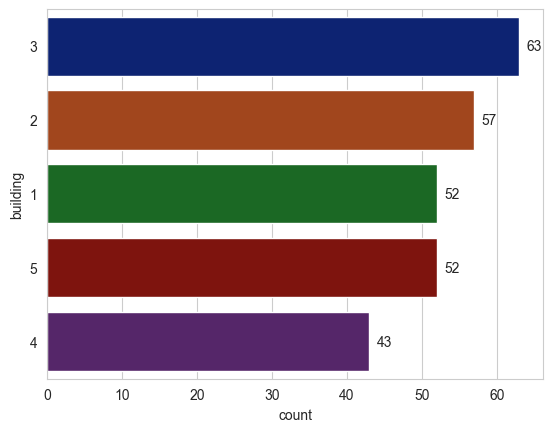

In [76]:
sns.countplot(data=data, y='building', order=data['building'].value_counts().index, palette='dark', saturation=0.8)
# Add annotations to the bars
for index, value in enumerate(data['building'].value_counts()):
    plt.text(value + 1, index, f'{value}', va='center')

In [77]:
building_groupped_data = data.groupby(['area','deal_satisfaction','purpose','country'])['building'].sum()
building_groupped_data

area     deal_satisfaction  purpose  country
410.71   5.0                0.0      USA        1
579.75   4.0                0.0      USA        3
587.28   1.0                1.0      USA        2
         3.0                1.0      USA        2
618.16   5.0                0.0      USA        5
                                               ..
1604.75  3.0                0.0      USA        2
         5.0                0.0      USA        2
1608.84  4.0                1.0      USA        4
1615.29  5.0                0.0      Canada     2
1942.50  5.0                1.0      USA        1
Name: building, Length: 154, dtype: object

In [78]:
## deriving totals per building
interested_columns = ['building','sold','mortgage']

## Create new variable to find the total counts grouped by building

totlas_by_building = data[interested_columns].groupby('building').sum()
totlas_by_building

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


In [79]:
## averages by building
columns2 = ['building','area','price_in_$','deal_satisfaction']

## Now create new variable

averages_by_building = data[columns2].groupby('building').mean()
averages_by_building

,area,price_in_$,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


### Country and state with building

* Breakdown of totals by country (frequency distribution by country)
* Breakdown of averages by country state
* Frequency distribution by state
* Relative frequency by state
* Cumulative frequency by state


In [80]:
columns_of_interest = ['country','sold','mortgage']
totals_by_country = data[columns_of_interest].groupby('country').sum()
totals_by_country

## Duplicated values available in country USA

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,165,61.0
USA,12,0.0


In [81]:
## Let's inspect the unique for 'country' 
data['country'].unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada', nan], dtype=object)

In [82]:
## AS a matter of fact , we can perform the cleanup operation on all columns at once
## To have possibility same issues in other columns
columns_ob = data.select_dtypes(['object']).columns
columns_ob

Index(['id', 'building', 'property', 'customer_id', 'country', 'state',
       'source', 'full_name'],
      dtype='object')

In [83]:
data[columns_ob] = data[columns_ob].apply(lambda x: x.str.strip())

In [84]:
# We got much cleaned dataset
totals_by_country = data[columns_of_interest].groupby('country').sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


#### Breakdown of averages by country

In [85]:
# For averages computation
column_3 = ['country','area','price_in_$','deal_satisfaction']

averages_by_country = data[column_3].groupby('country').mean()
averages_by_country

,area,price_in_$,deal_satisfaction
country,,,
Belgium,852.730000,229075.470000,3.000000
Canada,917.382857,274069.384286,5.000000
Denmark,785.480000,257183.480000,1.000000
Germany,743.410000,205098.210000,5.000000
Mexico,1283.450000,338181.180000,3.000000
Russia,903.757500,278828.835000,2.500000
UK,739.480000,220142.680000,4.000000
USA,900.794463,270096.266554,3.581921


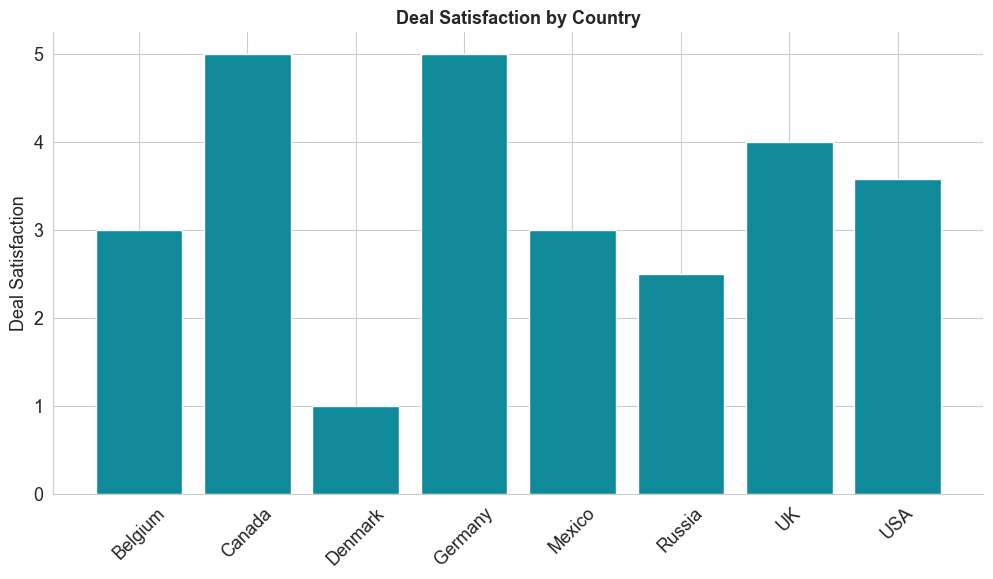

In [86]:
plt.figure(figsize = (12,6))
plt.bar(x = averages_by_country.index,
        height = averages_by_country['deal_satisfaction'],
        color = "#108A99")

plt.xticks(rotation= 45, fontsize = 13)
plt.yticks(fontsize =13)
plt.title("Deal Satisfaction by Country", fontsize =13, weight = 'bold')
plt.ylabel("Deal Satisfaction", fontsize =13)
sns.despine()
plt.show()

In [87]:
#### Frequency distribution by state
column_4 = ['state','sold','area','price_in_$','deal_satisfaction','mortgage']

totals_by_state = data[column_4].groupby('state').sum()
totals_by_state

,sold,area,price_in_$,deal_satisfaction,mortgage
state,,,,,
Arizona,11,9257.90,2854796.41,37.0,3.0
California,120,112053.25,33441688.96,450.0,41.0
Colorado,11,8547.12,2570287.08,35.0,5.0
Kansas,1,923.21,252185.99,3.0,0.0
Nevada,17,15668.78,4720038.60,55.0,8.0
Oregon,11,8436.50,2602526.55,34.0,1.0
Utah,5,4074.93,1188776.40,16.0,1.0
Virginia,4,2922.85,860576.75,18.0,2.0
Wyoming,1,701.66,204286.67,3.0,0.0


In [88]:
totals_by_state.sum()

sold                      181.00
area                   162586.20
price_in_$           48695163.41
deal_satisfaction         651.00
mortgage                   61.00
dtype: float64

In [89]:
totals_by_state.sold.sum()

181

In [90]:
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


In [91]:
data['state'] = np.where(data['state']=='',pd.NA, data['state'])
data['state'] = np.where(data['country']!='USA',pd.NA, data['state'])

In [92]:
totals_by_state = data[column_4].groupby('state').sum()
totals_by_state

,sold,area,price_in_$,deal_satisfaction,mortgage
state,,,,,
Arizona,9,7636.80,2385712.95,29.0,3.0
California,118,110528.77,33022648.19,441.0,41.0
Colorado,11,8547.12,2570287.08,35.0,5.0
Kansas,1,923.21,252185.99,3.0,0.0
Nevada,17,15668.78,4720038.60,55.0,8.0
Oregon,11,8436.50,2602526.55,34.0,1.0
Utah,5,4074.93,1188776.40,16.0,1.0
Virginia,4,2922.85,860576.75,18.0,2.0
Wyoming,1,701.66,204286.67,3.0,0.0


In [93]:
totals_by_state.sold.sum()

177

In [94]:
columns_5 = ['state','sold']

sold_by_state = data[columns_5].groupby('state').sum()
sold_by_state.sort_values('sold', ascending=False)

,sold
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


In [95]:
# Chnage the column name 'sold' to frequency
sold_by_state = sold_by_state.rename(columns = {'sold':'frequency'})
sold_by_state

,frequency
state,
Arizona,9
California,118
Colorado,11
Kansas,1
Nevada,17
Oregon,11
Utah,5
Virginia,4
Wyoming,1


#### Relative frequency distribution by state

In [96]:
sold_by_state['relative_frequency'] = sold_by_state['frequency']/ sold_by_state['frequency'].sum()
sold_by_state['relative_frequency']

state
Arizona       0.050847
California    0.666667
Colorado      0.062147
Kansas        0.005650
Nevada        0.096045
Oregon        0.062147
Utah          0.028249
Virginia      0.022599
Wyoming       0.005650
Name: relative_frequency, dtype: float64

In [97]:
sold_by_state.sort_values('frequency', ascending=False)

,frequency,relative_frequency
state,,
California,118,0.666667
Nevada,17,0.096045
Colorado,11,0.062147
Oregon,11,0.062147
Arizona,9,0.050847
Utah,5,0.028249
Virginia,4,0.022599
Kansas,1,0.005650
Wyoming,1,0.005650


In [98]:
## cumsum frequency
sold_by_state['cumulative_frequency'] = sold_by_state['relative_frequency'].cumsum()
sold_by_state.sort_values('frequency', ascending=False)

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.717514
Nevada,17,0.096045,0.881356
Colorado,11,0.062147,0.779661
Oregon,11,0.062147,0.943503
Arizona,9,0.050847,0.050847
Utah,5,0.028249,0.971751
Virginia,4,0.022599,0.994350
Kansas,1,0.005650,0.785311
Wyoming,1,0.005650,1.000000


### Segmentation by state(Pareto Diagram)

In [99]:
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
Arizona,9,0.050847,0.050847
California,118,0.666667,0.717514
Colorado,11,0.062147,0.779661
Kansas,1,0.005650,0.785311
Nevada,17,0.096045,0.881356
Oregon,11,0.062147,0.943503
Utah,5,0.028249,0.971751
Virginia,4,0.022599,0.994350
Wyoming,1,0.005650,1.000000


In [100]:
from matplotlib.ticker import PercentFormatter

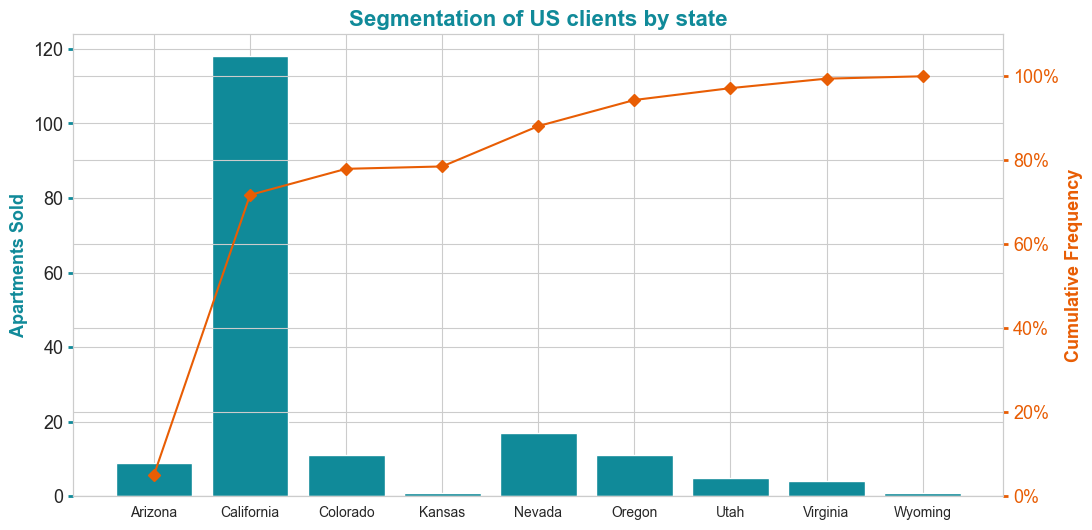

In [101]:
# to create pareto diagram
fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(sold_by_state.index,
       sold_by_state['frequency'],
       color = "#108A99")
# Setting a descriptive y-axis label
ax.set_ylabel("Apartments Sold",
              weight = "bold",
              fontsize = 13,
              color = "#108A99")
# formating the y-axis label
ax.tick_params(axis = "y",
               width =2,
               labelsize =13,
               color = "#108A99")

# Creating a second axis 
ax2 = ax.twinx()
ax2.set_ylim(0, 1.1)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=1.0))

ax2.plot(sold_by_state.index,
         sold_by_state['cumulative_frequency'],
         color = "#E85D04",
         marker = "D")

ax2.set_ylabel("Cumulative Frequency",
               color = "#E85D04",
               weight = 'bold',
               fontsize = 13)

ax2.tick_params(axis = "y",
                colors = "#E85D04",
                width = 2,
                labelsize =13)

ax.set_title("Segmentation of US clients by state", fontsize = 16, weight = 'bold', color = "#108A99")
plt.show()

## Data Analysis

#### Customers age

In [102]:
# Calculate age at the time of purchase
data['age_at_purchase'] = (data['date_sale'] - data['birth_date']).dt.days / 365.25
data['age_at_purchase']

0      19.364819
1      22.600958
2      21.508556
3      21.927447
4      25.467488
         ...    
262          NaN
263          NaN
264          NaN
265          NaN
266          NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [103]:
# Define the age bins
age_bins = [19.0, 25.0, 31.0, 36.0, 42.0, 48.0, 54.0, 59.0, 65.0, 71.0, 76.0]

# Define labels for the bins
age_labels = ['(19.0, 25.0]', '(25.0, 31.0]', '(31.0, 36.0]', '(36.0, 42.0]', '(42.0, 48.0]',
              '(48.0, 54.0]', '(54.0, 59.0]', '(59.0, 65.0]', '(65.0, 71.0]', '(71.0, 76.0]']

# Use pd.cut to categorize ages into the specified bins
data['age_interval'] = pd.cut(data['age_at_purchase'], bins=age_bins, labels=age_labels, right=False)

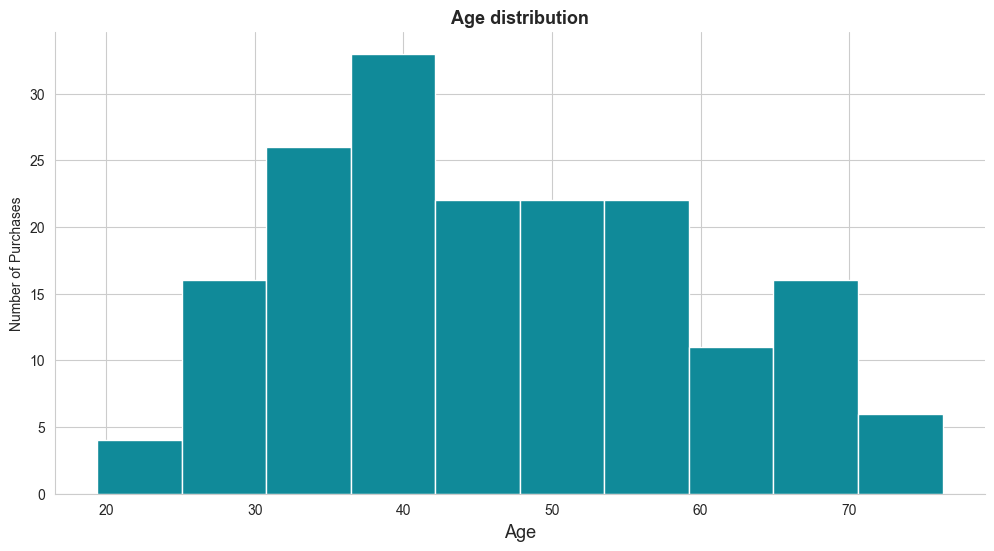

In [104]:
plt.figure(figsize=(12,6))
plt.hist(data['age_at_purchase'],
         bins = 10,
         color = "#108A99")
plt.title("Age distribution", fontsize = 13, weight = "bold")
plt.xlabel("Age", fontsize =13)
plt.ylabel("Number of Purchases")

sns.despine()
plt.show()

In [105]:
# Group data by 'age_interval' and count the number of properties sold in each interval
age_interval_counts = data['age_interval'].value_counts().reset_index()

# Rename the columns for clarity
age_interval_counts.columns = ['Age Interval', 'Number of Properties Sold']

# Sort the results by the age intervals
age_interval_counts = age_interval_counts.sort_values(by='Age Interval')

# Display the results
print(age_interval_counts)

   Age Interval  Number of Properties Sold
8  (19.0, 25.0]                          4
6  (25.0, 31.0]                         16
1  (31.0, 36.0]                         24
0  (36.0, 42.0]                         35
2  (42.0, 48.0]                         24
3  (48.0, 54.0]                         23
4  (54.0, 59.0]                         18
7  (59.0, 65.0]                         12
5  (65.0, 71.0]                         18
9  (71.0, 76.0]                          3


## Analysis the price of properties

#### Price interval

In [106]:
# Define the number of bins for price intervals
num_bins = 10

# Use pd.cut to categorize prices into the specified number of bins
data['price_interval'] = pd.cut(data['price_in_$'], bins=num_bins)
data['price_interval']

0      (243776.371, 285847.138]
1      (243776.371, 285847.138]
2      (201705.604, 243776.371]
3      (412059.439, 454130.206]
4      (454130.206, 496200.973]
                 ...           
262    (285847.138, 327917.905]
263    (243776.371, 285847.138]
264    (285847.138, 327917.905]
265    (327917.905, 369988.672]
266    (159634.837, 201705.604]
Name: price_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(117143.362, 159634.837] < (159634.837, 201705.604] < (201705.604, 243776.371] < (243776.371, 285847.138] ... (369988.672, 412059.439] < (412059.439, 454130.206] < (454130.206, 496200.973] < (496200.973, 538271.74]]

In [107]:


# Group data by 'price_interval' and 'status' and count the number of properties in each interval
price_interval_counts = data.groupby(['price_interval', 'sold']).size().reset_index(name='Number of Properties')

# Rename the columns for clarity
price_interval_counts.columns = ['Price Interval', 'sold', 'Number of Properties']

# Sort the results by the price intervals
price_interval_counts = price_interval_counts.sort_values(by='Price Interval')

# Display the results
print(price_interval_counts)

              Price Interval  sold  Number of Properties
0   (117143.362, 159634.837]     0                     1
1   (117143.362, 159634.837]     1                     2
2   (159634.837, 201705.604]     0                     4
3   (159634.837, 201705.604]     1                    28
4   (201705.604, 243776.371]     0                    20
5   (201705.604, 243776.371]     1                    68
6   (243776.371, 285847.138]     0                    13
7   (243776.371, 285847.138]     1                    34
9   (285847.138, 327917.905]     1                    24
8   (285847.138, 327917.905]     0                     7
10  (327917.905, 369988.672]     0                     6
11  (327917.905, 369988.672]     1                    12
12  (369988.672, 412059.439]     0                     8
13  (369988.672, 412059.439]     1                    13
14  (412059.439, 454130.206]     0                     3
15  (412059.439, 454130.206]     1                     4
16  (454130.206, 496200.973]   

In [108]:
column_6 = ['price_interval','sold']

properties_by_price = data[column_6].groupby('price_interval').count()

properties_by_price = properties_by_price.rename(columns={'sold':'count'})
properties_by_price.sort_values('price_interval', ascending=True)

,count
price_interval,
"(117143.362, 159634.837]",3
"(159634.837, 201705.604]",32
"(201705.604, 243776.371]",88
"(243776.371, 285847.138]",47
"(285847.138, 327917.905]",31
"(327917.905, 369988.672]",18
"(369988.672, 412059.439]",21
"(412059.439, 454130.206]",7
"(454130.206, 496200.973]",11


#### Relationship between age and price

In [109]:
corr_age = data['price_in_$'].corr(data['age_at_purchase'])
# Print the correlation coefficient
print("Correlation between 'price' and 'age_at_purchase':", corr_age)

Correlation between 'price' and 'age_at_purchase': -0.1744388946882141


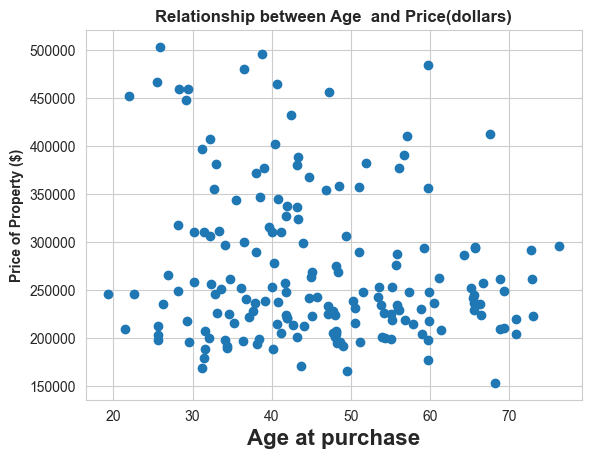

In [110]:
#### relation between area and price_in_$
plt.scatter(x = "age_at_purchase", y="price_in_$", data = data)
plt.title('Relationship between Age  and Price(dollars)', weight = 'bold')
plt.xlabel("Age at purchase", weight = 'bold', fontsize = 16)
plt.ylabel("Price of Property ($)", weight = 'bold')
plt.show()

In [111]:
# Calculate the covariance between 'property' and 'age_at_purchase'
covariance = data['price_in_$'].cov(data['age_at_purchase'])

# Print the covariance value
print("Covariance between 'price' and 'age_at_purchase':", covariance)

Covariance between 'price' and 'age_at_purchase': -177604.49520276245


#### Relationship between age and property

In [112]:
corr_age = data['property'].corr(data['age_at_purchase'])
# Print the correlation coefficient
print("Correlation between 'property' and 'age_at_purchase':", corr_age)


Correlation between 'property' and 'age_at_purchase': -0.1161288412418912


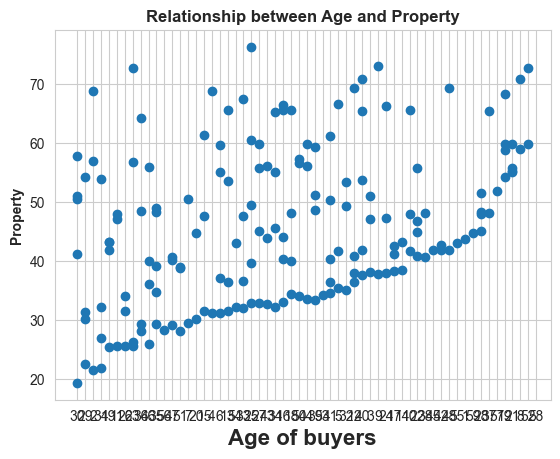

In [113]:
#### relation between area and price_in_$
plt.scatter(x = "property", y="age_at_purchase", data = data)
plt.title('Relationship between Age and Property', weight = 'bold')
plt.xlabel("Age of buyers", weight = 'bold', fontsize = 16)
plt.ylabel("Property", weight = 'bold')
plt.show()

In [114]:
# Calculate the covariance between 'property' and 'age_at_purchase'
covariance = data['property'].cov(data['age_at_purchase'])

# Print the covariance value
print("Covariance between 'property' and 'age_at_purchase':", covariance)

Covariance between 'property' and 'age_at_purchase': -22.25486691734521


#### Relationshio between area and price 

In [115]:
corr_area_price = data['area'].corr(data['price_in_$'])
corr_area_price

0.9510873336790355

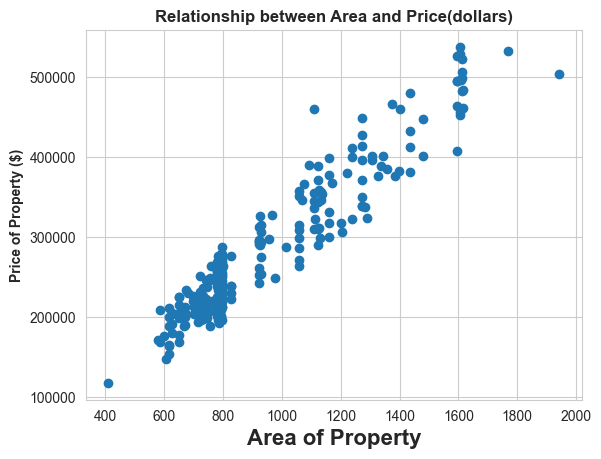

In [116]:
#### relation between area and price_in_$
plt.scatter(x = "area", y="price_in_$", data = data)
plt.title('Relationship between Area and Price(dollars)', weight = 'bold')
plt.xlabel("Area of Property", weight = 'bold', fontsize = 16)
plt.ylabel("Price of Property ($)", weight = 'bold')
plt.show()

### Total Sales per Year 

In [117]:
data['date_sale'][0].year

2005

In [118]:
data['year_sale'] = data['date_sale'].apply(lambda x: x.year)
data['year_sale']

0      2005.0
1      2005.0
2      2007.0
3      2007.0
4      2004.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: year_sale, Length: 267, dtype: float64

In [119]:
## Convert to int
data['year_sale'] = data['year_sale'].fillna(0).astype(int)

## we convert all zeros back to NA
data['year_sale'] = data['year_sale'].replace({0:pd.NA})

In [120]:
columns_of_interest = ['year_sale', 'price_in_$']
revenue_per_year = data[columns_of_interest].groupby('year_sale').sum()

## we rename the 'price_in_$' column to 'revenue'
revenue_per_year = revenue_per_year.rename(columns ={'price_in_$':'revenue'})
revenue_per_year

,revenue
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20


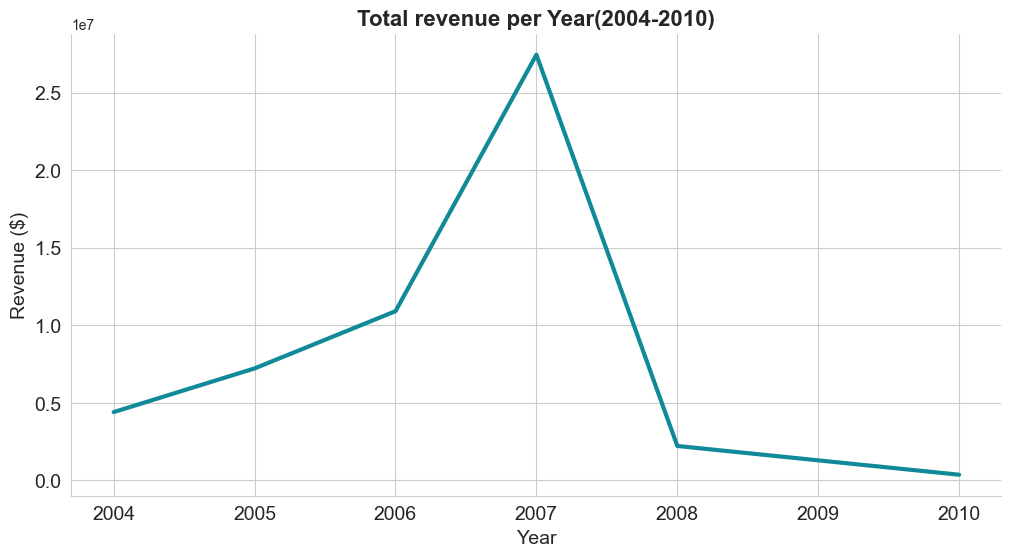

In [121]:
plt.figure(figsize=(12,6))

plt.plot(revenue_per_year['revenue'],
         color = '#108A99',
         linewidth =3)

plt.title("Total revenue per Year(2004-2010)", fontsize = 16, weight = 'bold')
plt.ylabel('Revenue ($)', fontsize = 14)
plt.xlabel("Year", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

sns.despine()
plt.show()

In [122]:
## Now, we will convert revenue in millions
revenue_per_year['revenue_in_M'] = revenue_per_year['revenue'] / 1000000

In [123]:
revenue_per_year

,revenue,revenue_in_M
year_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2010,357538.20,0.357538


### Years Sales Distribution Acroos buildings

In [124]:
## Create new data variable
data_stacked_area = data.copy()

In [125]:
dummies_for_building = pd.get_dummies(data_stacked_area['building'])
dummies_for_building.head()

,1,2,3,4,5
0,True,False,False,False,False
1,True,False,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,True,False,False,False,False


In [126]:
data_stacked_area = pd.concat([data_stacked_area, dummies_for_building], axis = 1)
data_stacked_area.head()

,id,building,date_sale,type,property,area,sold,customer_id,price_in_$,entity,...,full_name,age_at_purchase,age_interval,price_interval,year_sale,1,2,3,4,5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,Madalyn Mercer,19.364819,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,Lara Carrillo,22.600958,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,Donavan Flowers,21.508556,"(19.0, 25.0]","(201705.604, 243776.371]",2007,False,True,False,False,False
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,Darien Dorsey,21.927447,"(19.0, 25.0]","(412059.439, 454130.206]",2007,False,True,False,False,False
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,Alessandra Perry,25.467488,"(25.0, 31.0]","(454130.206, 496200.973]",2004,True,False,False,False,False


In [127]:
# Now we can rename them accordingly
data_stacked_area = data_stacked_area.rename(columns = {'1':'building1',
                                                        '2':'building2',
                                                        '3':'building3',
                                                        '4':'building4',
                                                        '5':'building5'})
data_stacked_area.head()

,id,building,date_sale,type,property,area,sold,customer_id,price_in_$,entity,...,full_name,age_at_purchase,age_interval,price_interval,year_sale,building1,building2,building3,building4,building5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,Madalyn Mercer,19.364819,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,Lara Carrillo,22.600958,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,Donavan Flowers,21.508556,"(19.0, 25.0]","(201705.604, 243776.371]",2007,False,True,False,False,False
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,Darien Dorsey,21.927447,"(19.0, 25.0]","(412059.439, 454130.206]",2007,False,True,False,False,False
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,Alessandra Perry,25.467488,"(25.0, 31.0]","(454130.206, 496200.973]",2004,True,False,False,False,False


In [128]:
# Filter out only the sold apartments, as they are the only ones of interest
data_stacked_area = data_stacked_area[data_stacked_area['sold']==1]

In [129]:
columns_of_interest = ['year_sale','building1','building2','building3','building4','building5']
stacked_area = data_stacked_area[columns_of_interest].groupby('year_sale').sum()
stacked_area

,building1,building2,building3,building4,building5
year_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1


* the result is the data per year and per building

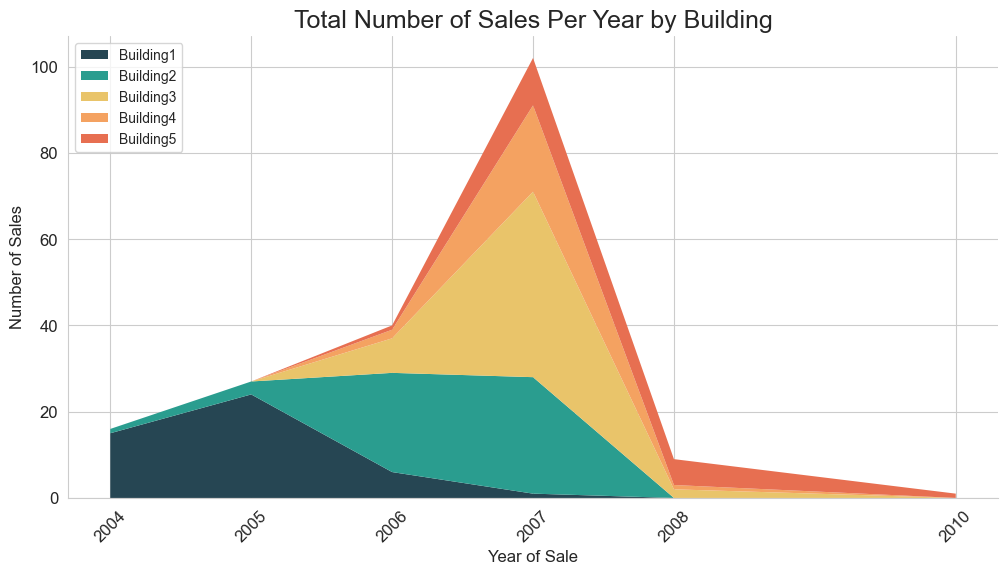

In [130]:
colors = ['#264653','#2A9D8F','#E9C46A','#F4A261','#E76F51']
# colors for each individual buidling
labels = ['Building1','Building2','Building3','Building4','Building5']
          
plt.figure(figsize=(12,6))
plt.stackplot(stacked_area.index,
              stacked_area['building1'],
              stacked_area['building2'],
              stacked_area['building3'],
              stacked_area['building4'],
              stacked_area['building5'],
              colors = colors,
              edgecolor = 'none')

plt.xticks(stacked_area.index, rotation = 45)
plt.legend(labels = labels, loc = 'upper left')

plt.ylabel("Number of Sales", fontsize = 12)
plt.xlabel('Year of Sale', fontsize =12)
plt.xticks(fontsize=12)
plt.yticks(fontsize =12)
plt.title("Total Number of Sales Per Year by Building", fontsize =18)
sns.despine()
plt.show()


Thank You